In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getDataPart(inputFiles):
    
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    
    cols.append('p_part')
    cols.append('pT_part')
    cols.append('eta_part')
    cols.append('theta_part')

    scalar.append('p_electron')
    scalar.append('eta_electron')
    scalar.append('theta_electron')
    
    lists = scalar + cols
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [23]:
xedges = [0.008, 0.01, 0.02, 0.03, 0.05, 0.1, 0.5]
Q2edges = [1, 10, 25, 55, 100, 200, 400, 5000]
radii_small = [0, 5, 10, 15, 20]
r_labels_small = ['0','5','10','15', '20']
radii_large = [0, 10, 20, 30, 40, 50]
r_labels_large = ['0','10','20','30','40','50']
angles = [90, 139.604937421, 164.585373193, 174.299529125, 177.90141703, 180, 182.09858297, 185.700470875, 195.414626807,
          220.395062579, 270, 319.604937421, 344.585373193, 354.299529125, 357.90141703, 360]
eta_labels = ['0','-1','-2','-3','-4','$-\infty$','-4','-3','-2','-1','0','1','2','3','4', '$\infty$']
nr_small = 20
nr_large = 50
ntheta = 90

In [4]:
files_part = ["$HOME/fjpythia/output/716.root"]
b = getDataPart(files_part)

# general cuts
df4 = applyCut(b, 'pT_part > 0.25', 'pT_part > 0.25')
df4 = applyCut(df4, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
df4 = applyCut(df4, 'W2 > 4', 'W2 > 4')
df4.eval('theta_part_neg = 6.28318530718 - theta_part', inplace = True)


Processed $HOME/fjpythia/output/716.root in 1907.3 seconds
pT_part > 0.25 66920241  fraction kept: 89.8
0.01 < y < 0.85 42592941  fraction kept: 63.6
W2 > 4 42592941  fraction kept: 100.0


In [24]:
ds_part = applyCuts(df4, xedges, Q2edges)


1 < Q2 < 10 GeV2 

1 < Q2 < 10 34714006  fraction kept: 81.5
0.008 < x < 0.01 2792930  fraction kept: 8.0
0.01 < x < 0.02 7136341  fraction kept: 20.6
0.02 < x < 0.03 2352991  fraction kept: 6.8
0.03 < x < 0.05 1658112  fraction kept: 4.8
0.05 < x < 0.1 798949  fraction kept: 2.3
0.1 < x < 0.5 37651  fraction kept: 0.1

10 < Q2 < 25 GeV2 

10 < Q2 < 25 5087048  fraction kept: 11.9
0.008 < x < 0.01 313683  fraction kept: 6.2
0.01 < x < 0.02 934543  fraction kept: 18.4
0.02 < x < 0.03 499805  fraction kept: 9.8
0.03 < x < 0.05 582375  fraction kept: 11.4
0.05 < x < 0.1 691947  fraction kept: 13.6
0.1 < x < 0.5 513204  fraction kept: 10.1

25 < Q2 < 55 GeV2 

25 < Q2 < 55 1791321  fraction kept: 4.2
0.008 < x < 0.01 106641  fraction kept: 6.0
0.01 < x < 0.02 361046  fraction kept: 20.2
0.02 < x < 0.03 204438  fraction kept: 11.4
0.03 < x < 0.05 244216  fraction kept: 13.6
0.05 < x < 0.1 292057  fraction kept: 16.3
0.1 < x < 0.5 396964  fraction kept: 22.2

55 < Q2 < 100 GeV2 

55 < Q2 < 

In [10]:
def plot(Q2Index, xIndex, Q2Str, xStr, txt):
    
    fig = plt.figure(figsize=(16,13))
    plt.subplots_adjust(wspace=0, hspace=0)
    
    plt.subplot(111, polar=True)
    df_part = ds_part[Q2Index][xIndex]
    df_e = keepOneJet(df_part)
    polar(Q2Index, xIndex, df_part['p_part'], df_part['theta_part_neg'], 'particle', df_e['p_electron'], df_e['theta_electron'], 'Greys')
    plt.suptitle(xStr + ',$' + Q2Str + 'GeV^2$', fontsize=40)
    
    plt.savefig('images/'+txt+'part.png', bbox_inches='tight')


Remove extra jets 382696  fraction kept: 13.7


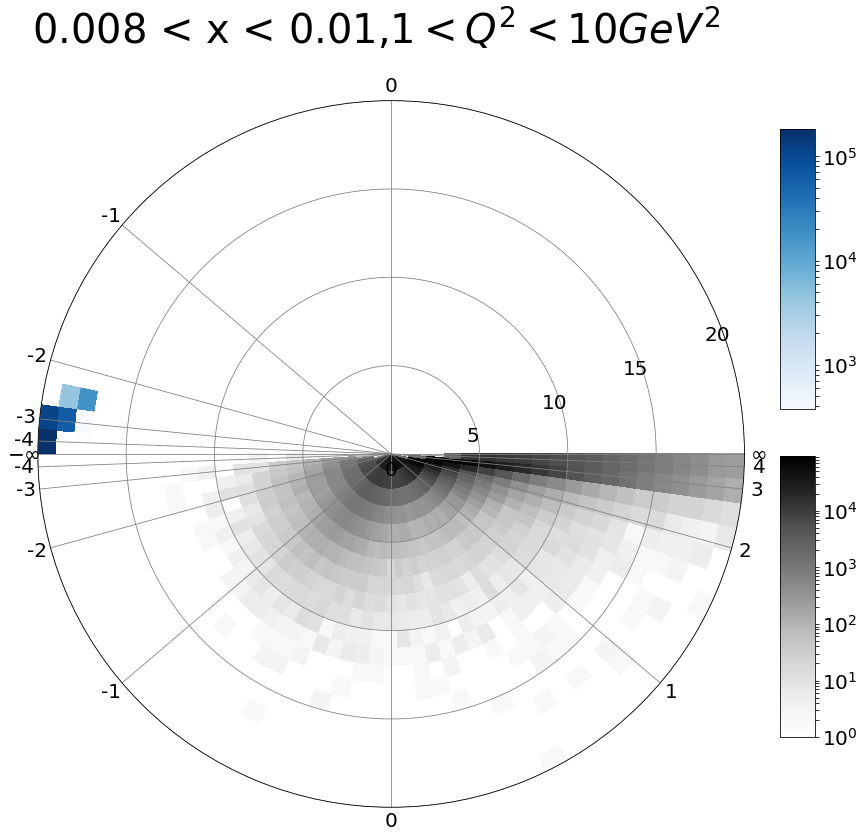

In [10]:
plot(0, 0, '1 < Q^2 < 10', '0.008 < x < 0.01', '1-10-008-01')


Remove extra jets 1537156  fraction kept: 13.8


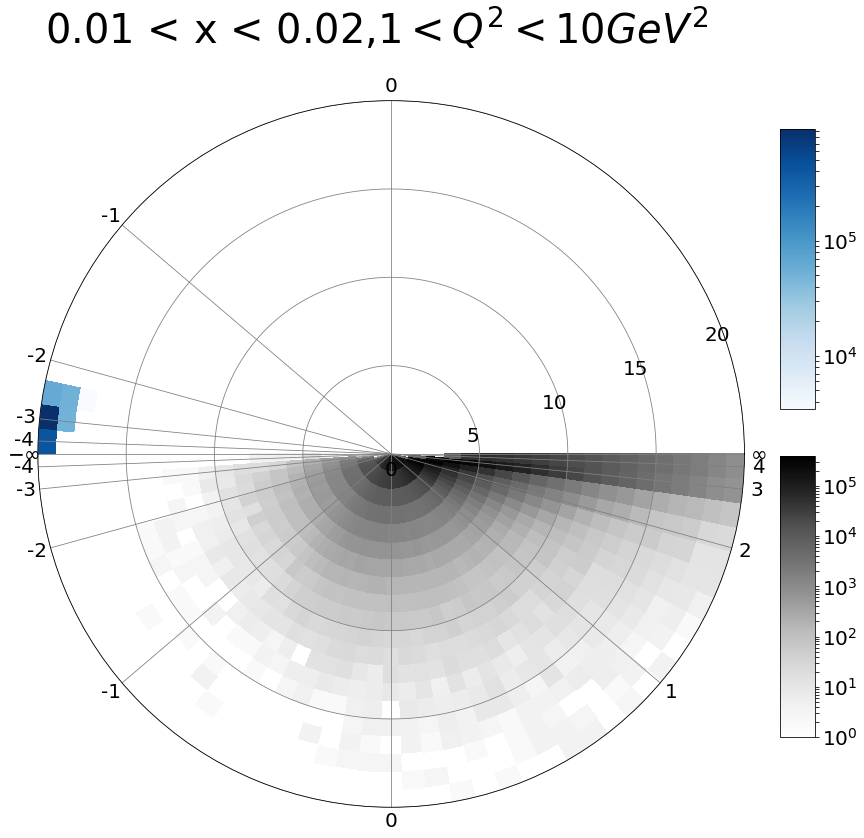

In [11]:
plot(0, 1, '1 < Q^2 < 10', '0.01 < x < 0.02', '1-10-01-02')


Remove extra jets 106556  fraction kept: 13.3


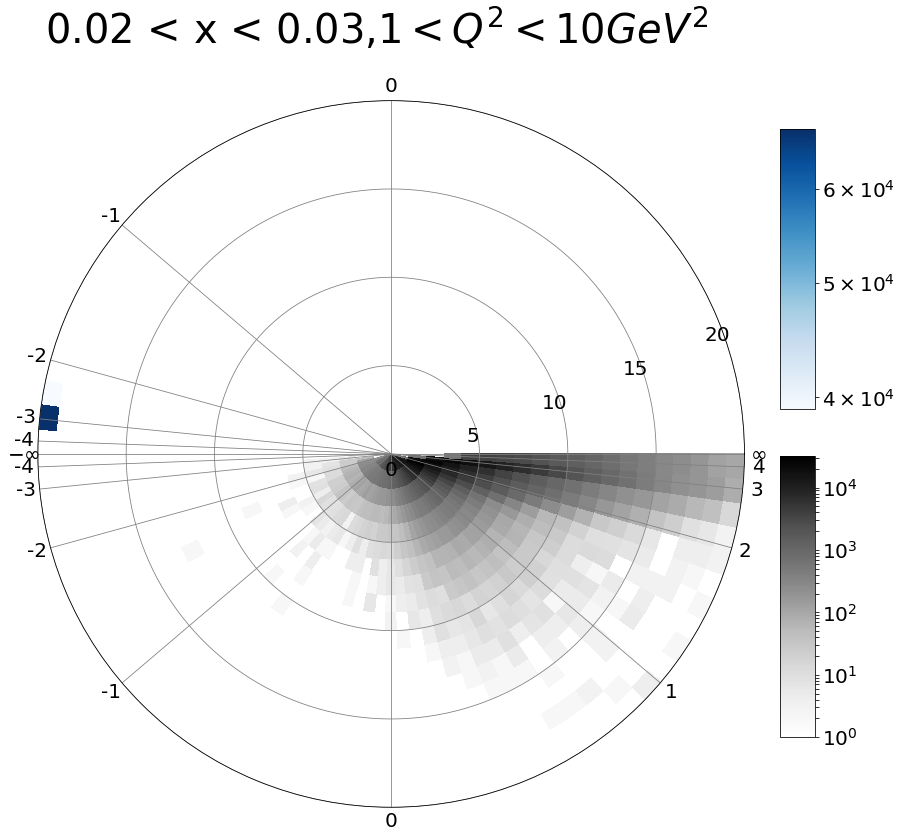

In [12]:
plot(0, 2, '1 < Q^2 < 10', '0.02 < x < 0.03', '1-10-02-03')


Remove extra jets 5117  fraction kept: 13.6


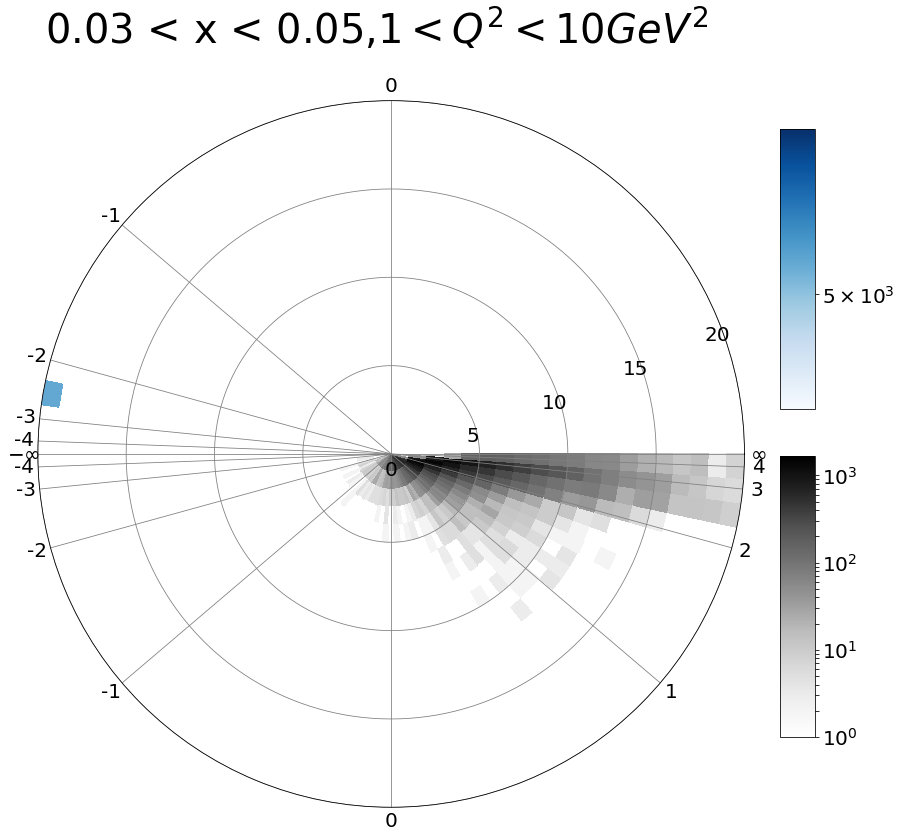

In [13]:
plot(0, 3, '1 < Q^2 < 10', '0.03 < x < 0.05', '1-10-03-05')


Remove extra jets 106556  fraction kept: 13.3


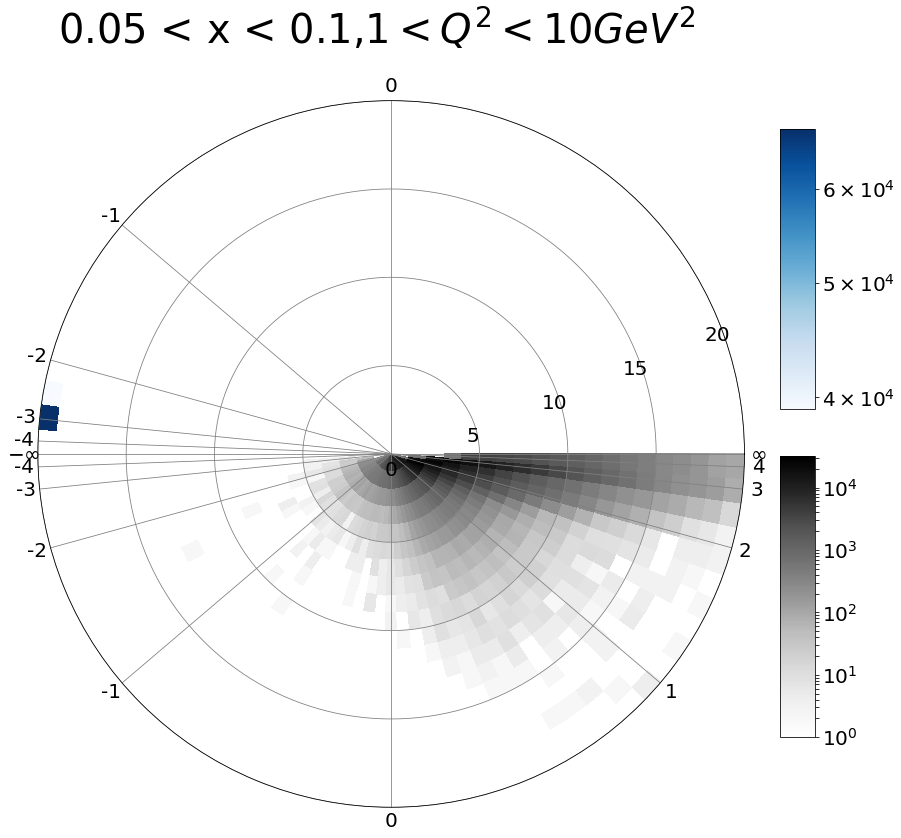

In [11]:
plot(0, 4, '1 < Q^2 < 10', '0.05 < x < 0.1', '1-10-05-1')


Remove extra jets 31123  fraction kept: 9.9


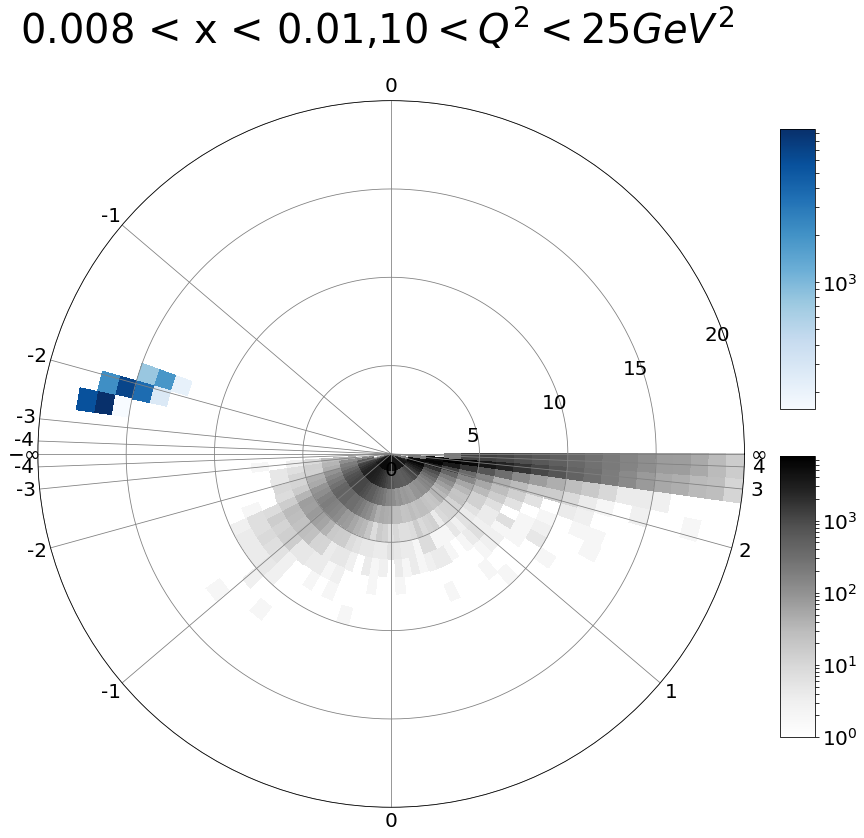

In [14]:
plot(1, 0, '10 < Q^2 < 25', '0.008 < x < 0.01', '10-25-008-01')


Remove extra jets 5117  fraction kept: 13.6


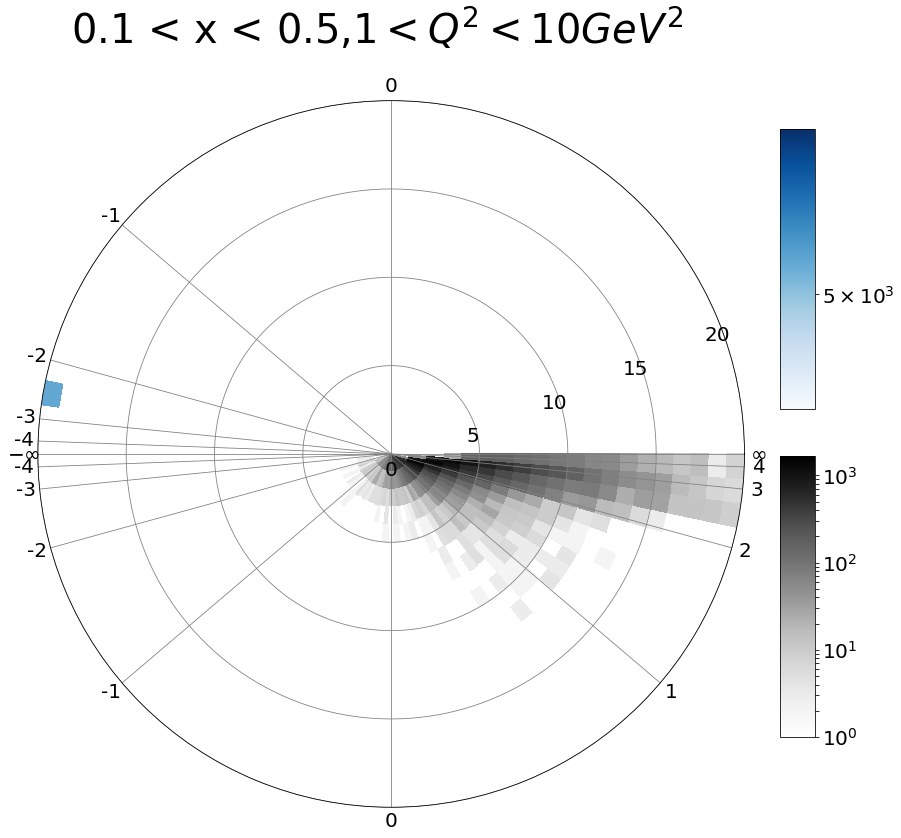

In [12]:
plot(0, 5, '1 < Q^2 < 10', '0.1 < x < 0.5', '1-10-1-5')


Remove extra jets 214269  fraction kept: 10.6


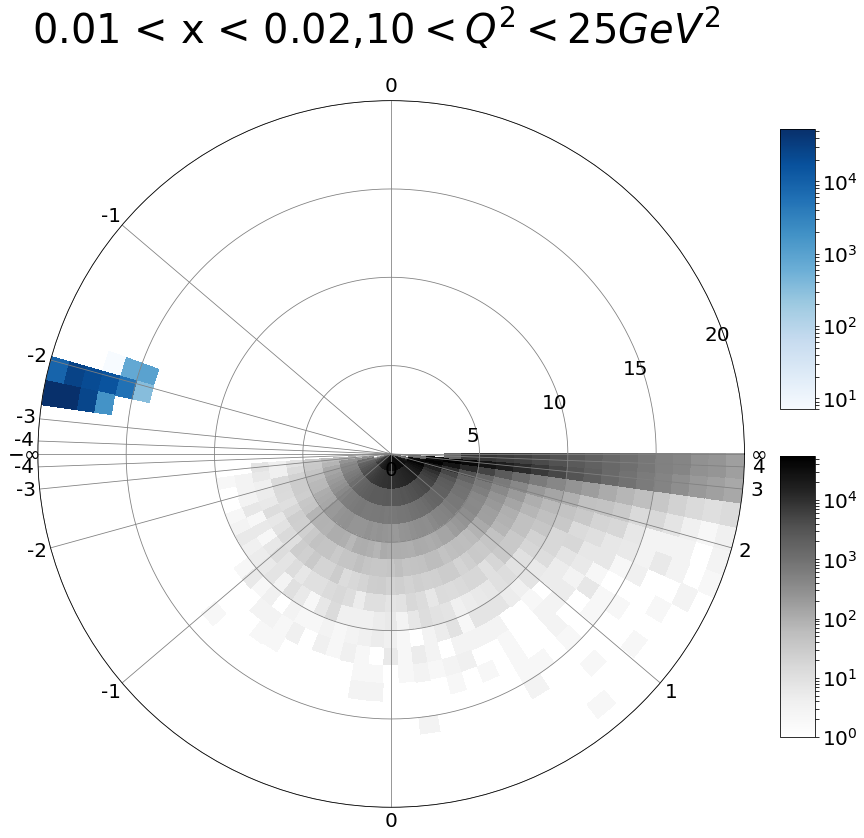

In [15]:
plot(1, 1, '10 < Q^2 < 25', '0.01 < x < 0.02', '10-25-01-02')


Remove extra jets 82092  fraction kept: 11.9


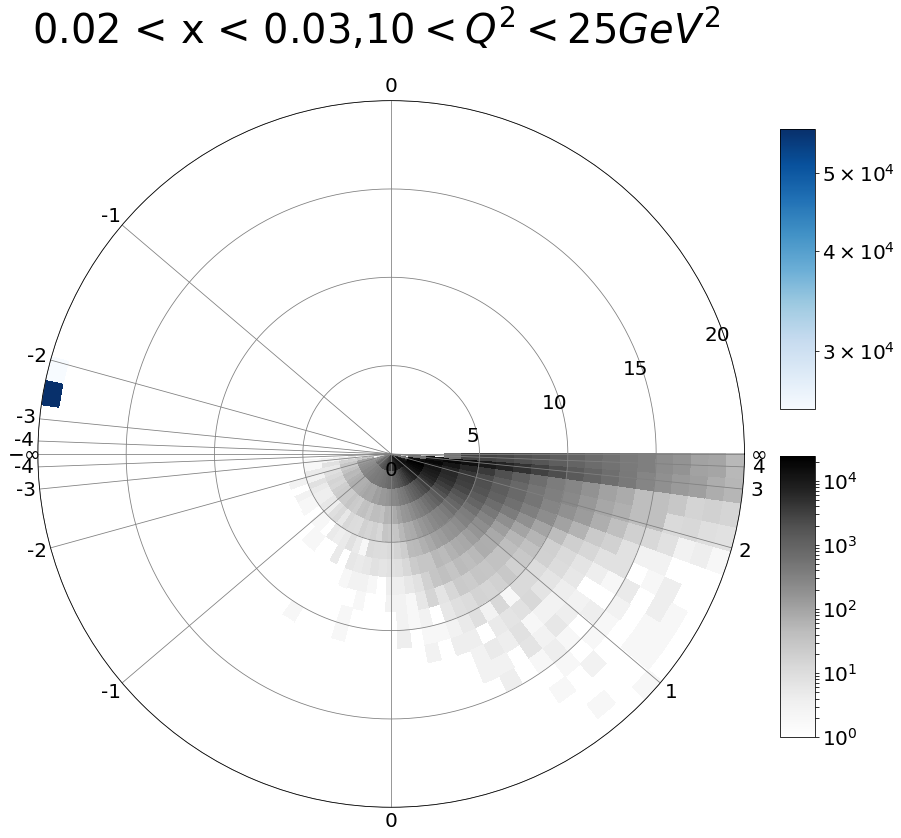

In [16]:
plot(1, 2, '10 < Q^2 < 25', '0.02 < x < 0.03', '10-25-02-03')


Remove extra jets 65515  fraction kept: 12.8


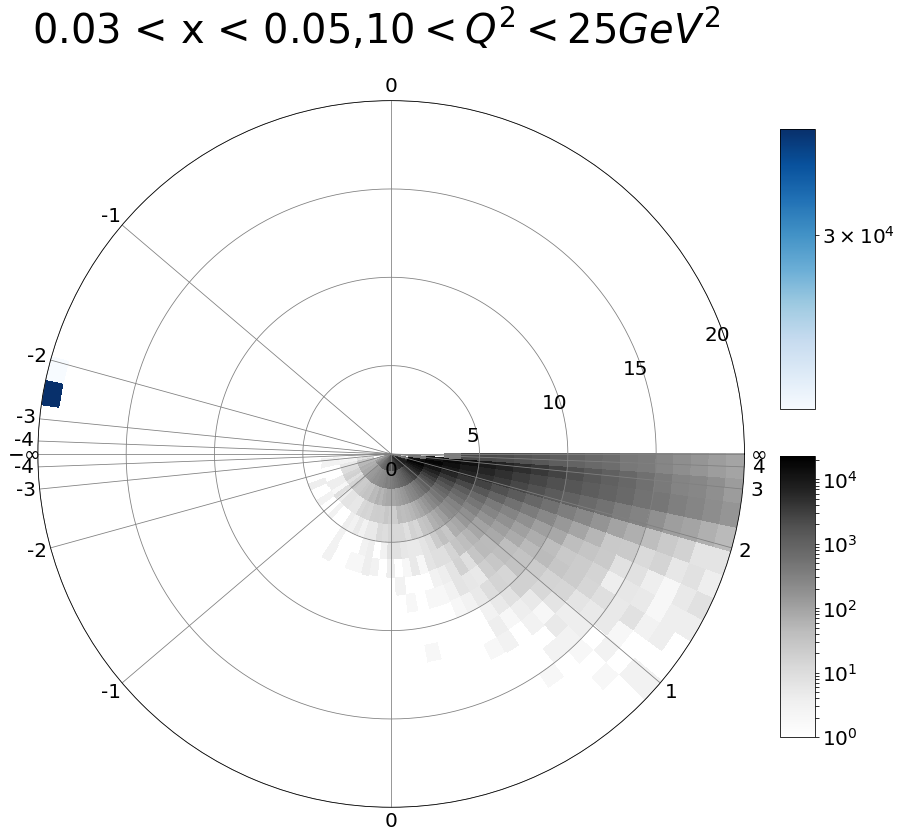

In [17]:
plot(1, 3, '10 < Q^2 < 25', '0.03 < x < 0.05', '10-25-03-05')


Remove extra jets 82092  fraction kept: 11.9


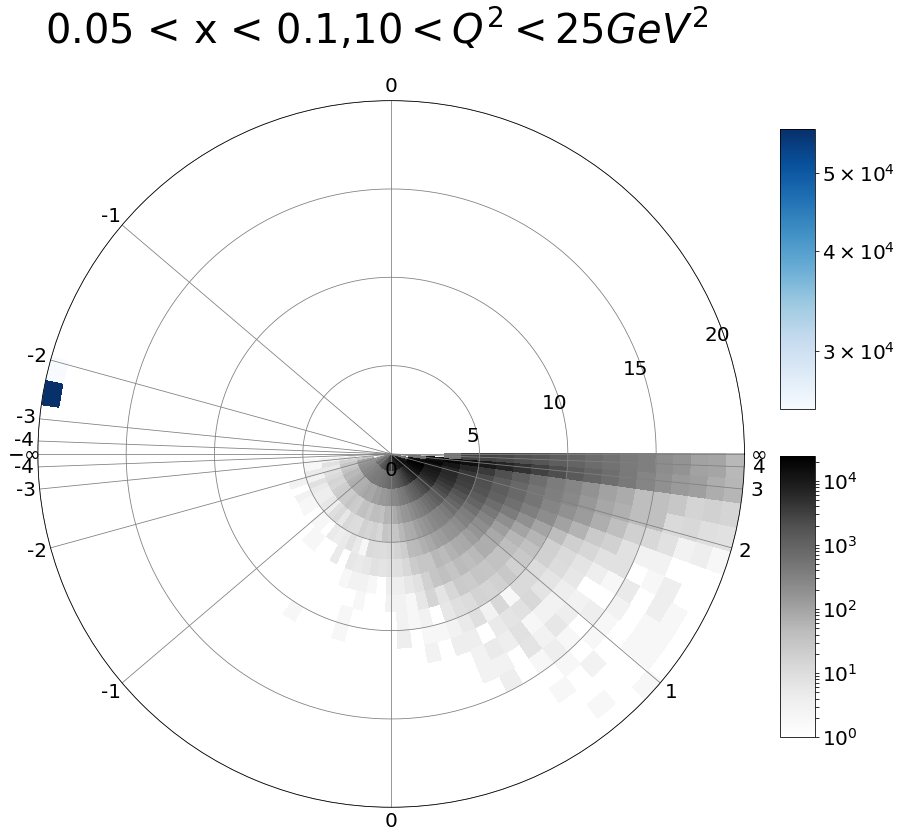

In [13]:
plot(1, 4, '10 < Q^2 < 25', '0.05 < x < 0.1', '10-25-05-1')


Remove extra jets 65552  fraction kept: 12.8


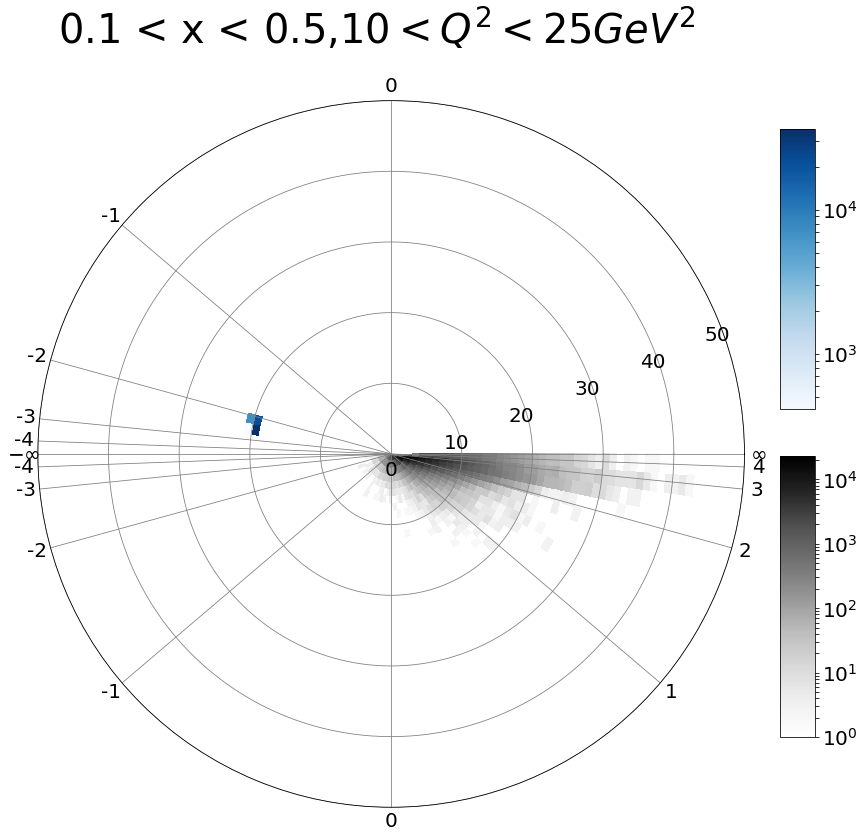

In [20]:
plot(1, 5, '10 < Q^2 < 25', '0.1 < x < 0.5', '10-25-1-5')


Remove extra jets 9383  fraction kept: 8.8


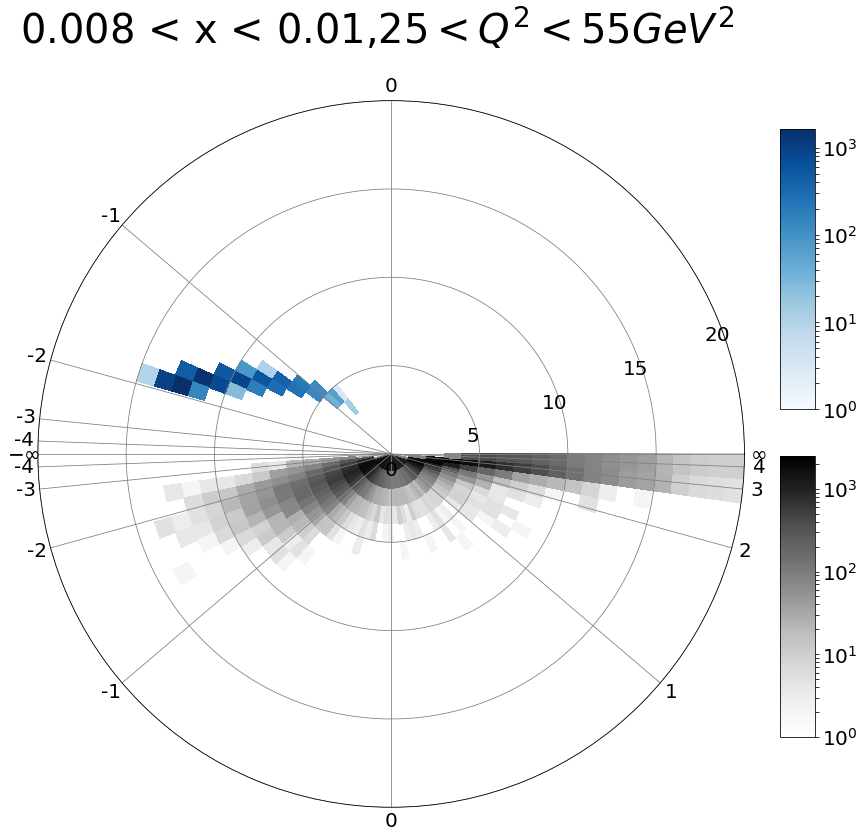

In [27]:
plot(2, 0, '25 < Q^2 < 55', '0.008 < x < 0.01', '25-55-008-01')


Remove extra jets 32254  fraction kept: 8.9


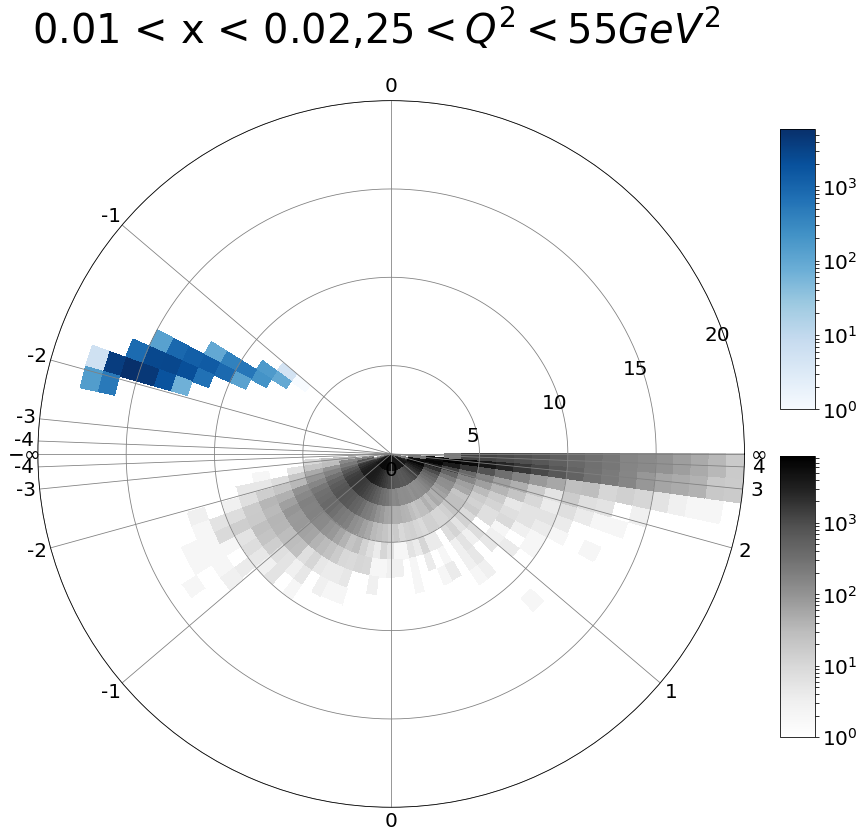

In [28]:
plot(2, 1, '25 < Q^2 < 55', '0.01 < x < 0.02', '25-55-01-02')


Remove extra jets 18886  fraction kept: 9.2


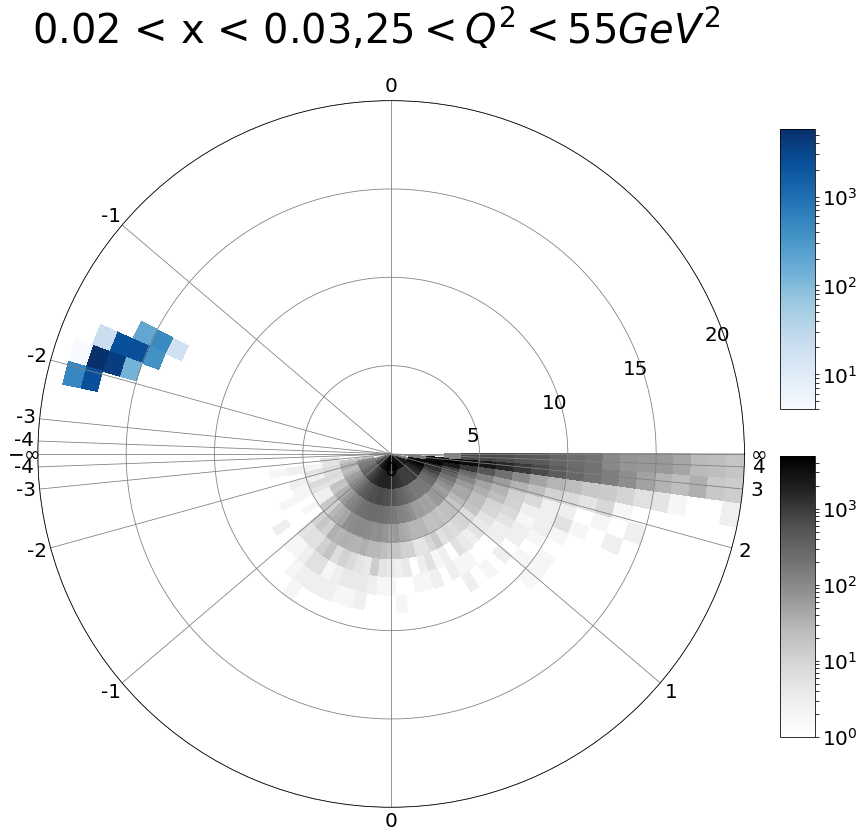

In [29]:
plot(2, 2, '25 < Q^2 < 55', '0.02 < x < 0.03', '25-55-02-03')


Remove extra jets 23577  fraction kept: 9.7


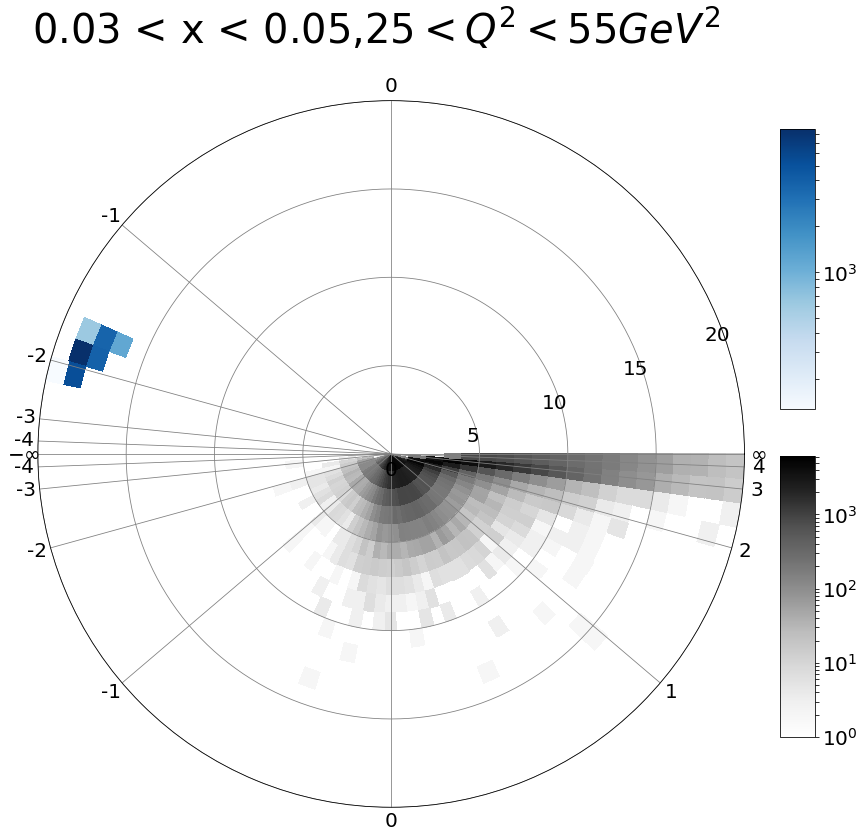

In [30]:
plot(2, 3, '25 < Q^2 < 55', '0.03 < x < 0.05', '25-55-03-05')


Remove extra jets 29903  fraction kept: 10.2


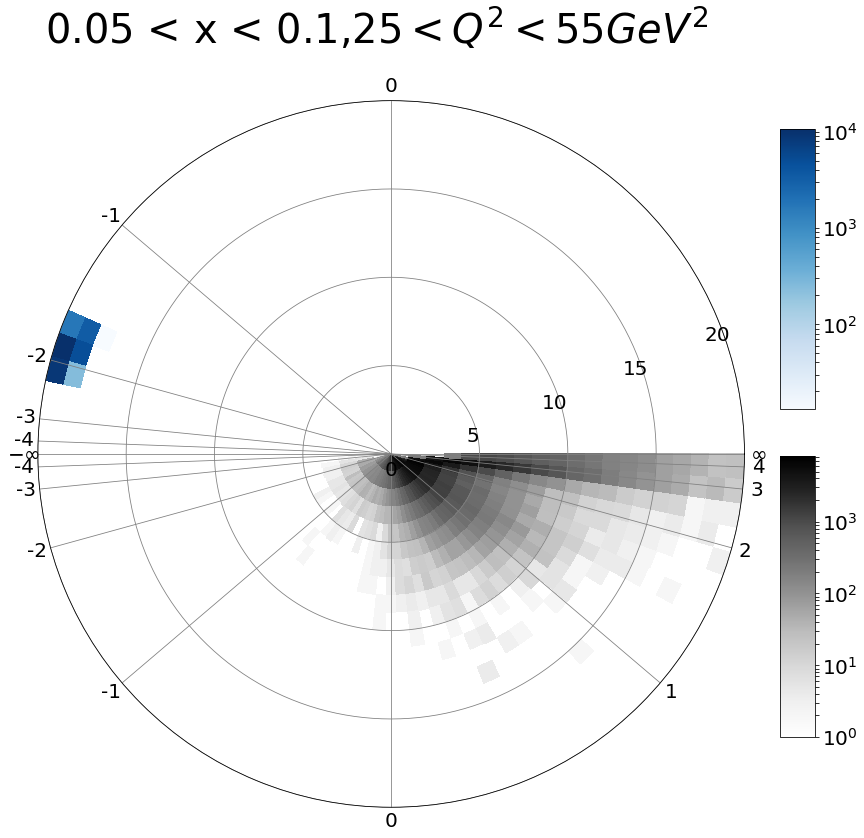

In [15]:
plot(2, 4, '25 < Q^2 < 55', '0.05 < x < 0.1', '25-55-05-1')


Remove extra jets 46295  fraction kept: 11.7


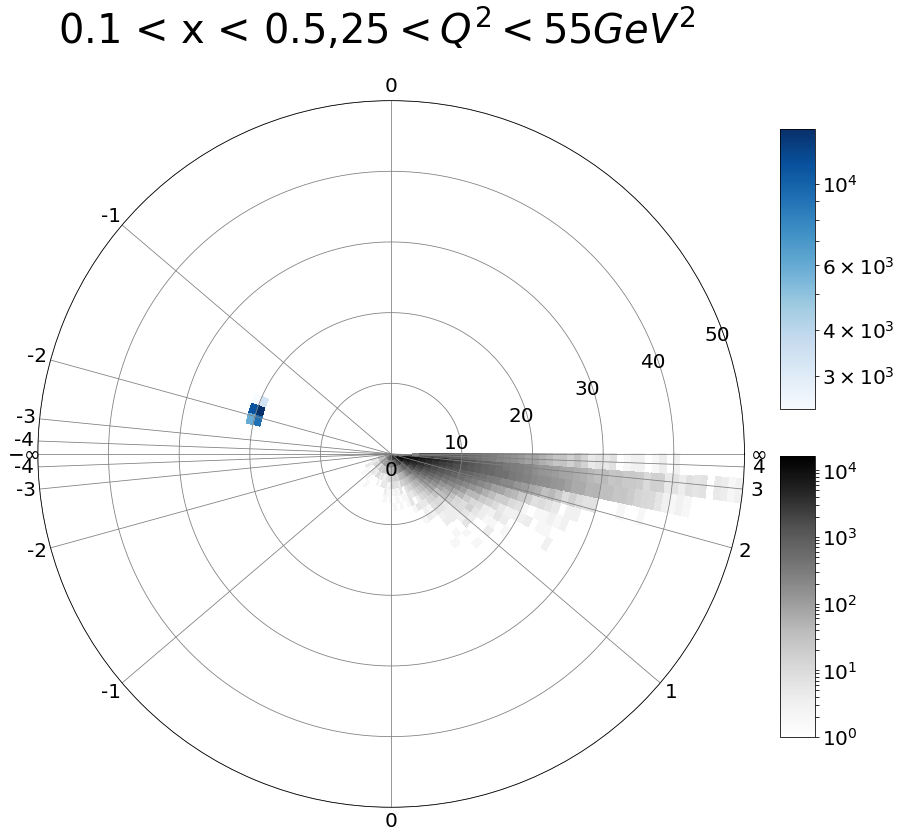

In [21]:
plot(2, 5, '25 < Q^2 < 55', '0.1 < x < 0.5', '25-55-1-5')


Remove extra jets 529  fraction kept: 8.6


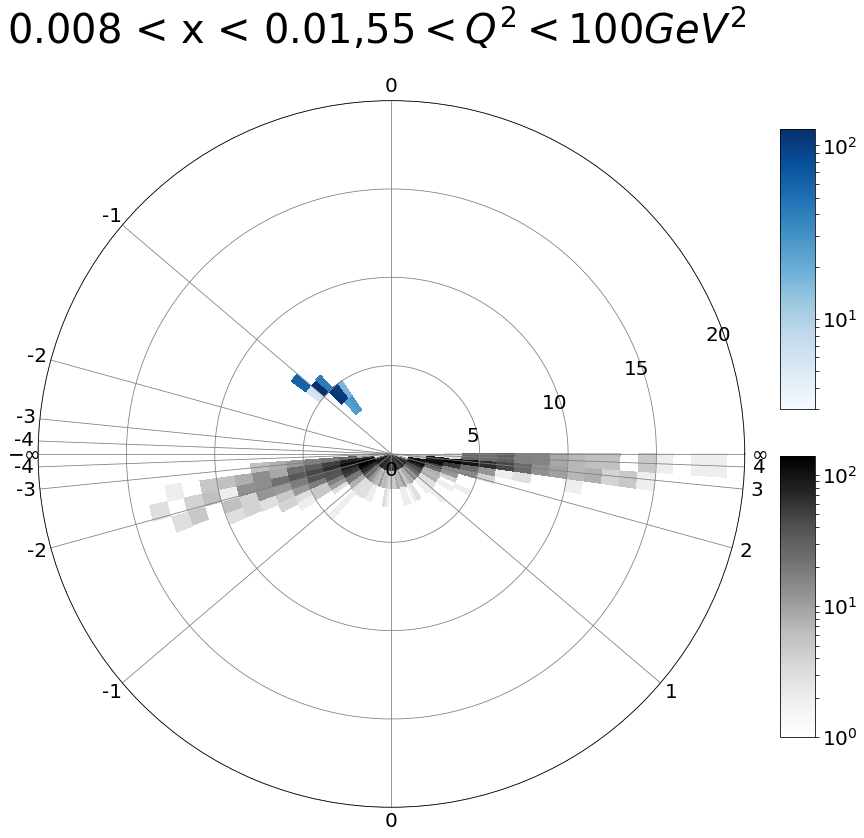

In [34]:
plot(3, 0, '55 < Q^2 < 100', '0.008 < x < 0.01', '55-100-008-01')


Remove extra jets 8485  fraction kept: 8.3


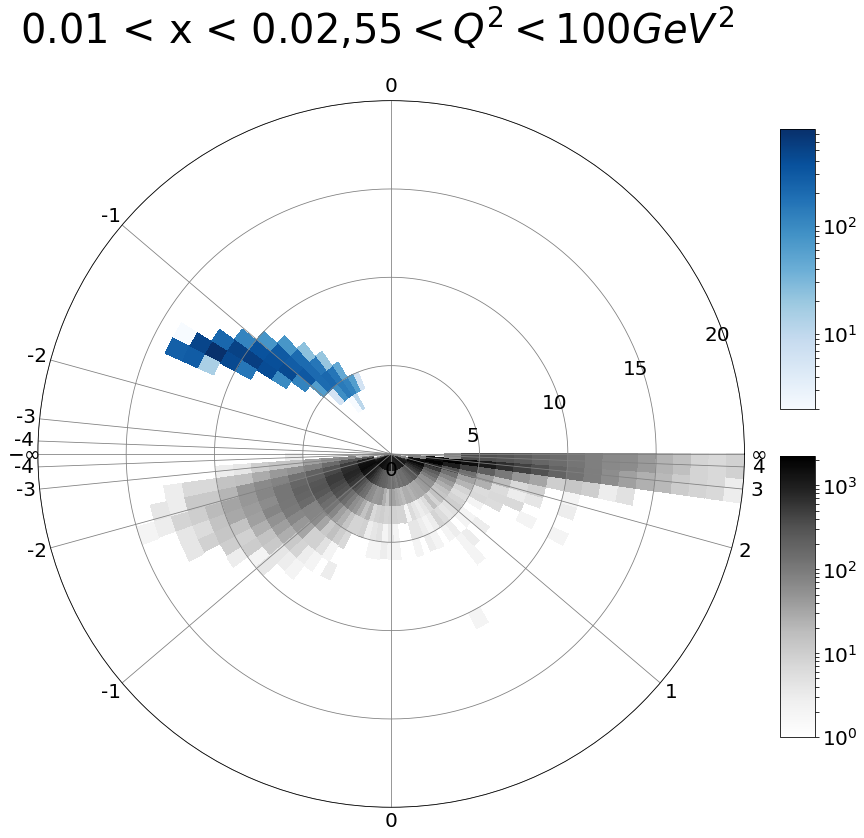

In [31]:
plot(3, 1, '55 < Q^2 < 100', '0.01 < x < 0.02', '55-100-01-02')


Remove extra jets 6305  fraction kept: 8.4


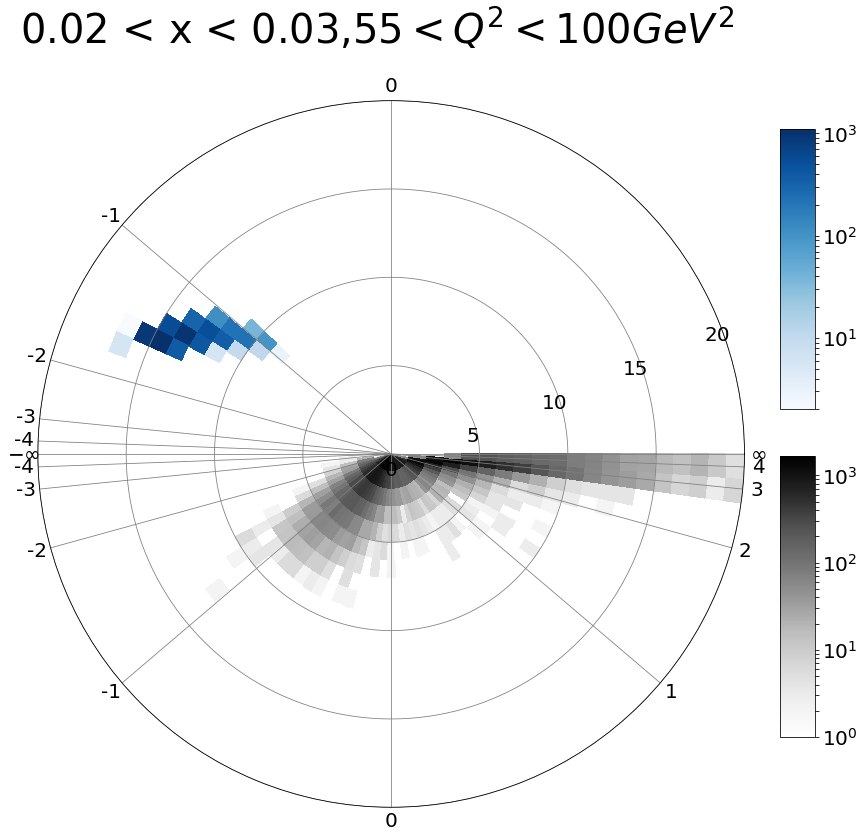

In [32]:
plot(3, 2, '55 < Q^2 < 100', '0.02 < x < 0.03', '55-100-02-03')


Remove extra jets 8138  fraction kept: 8.7


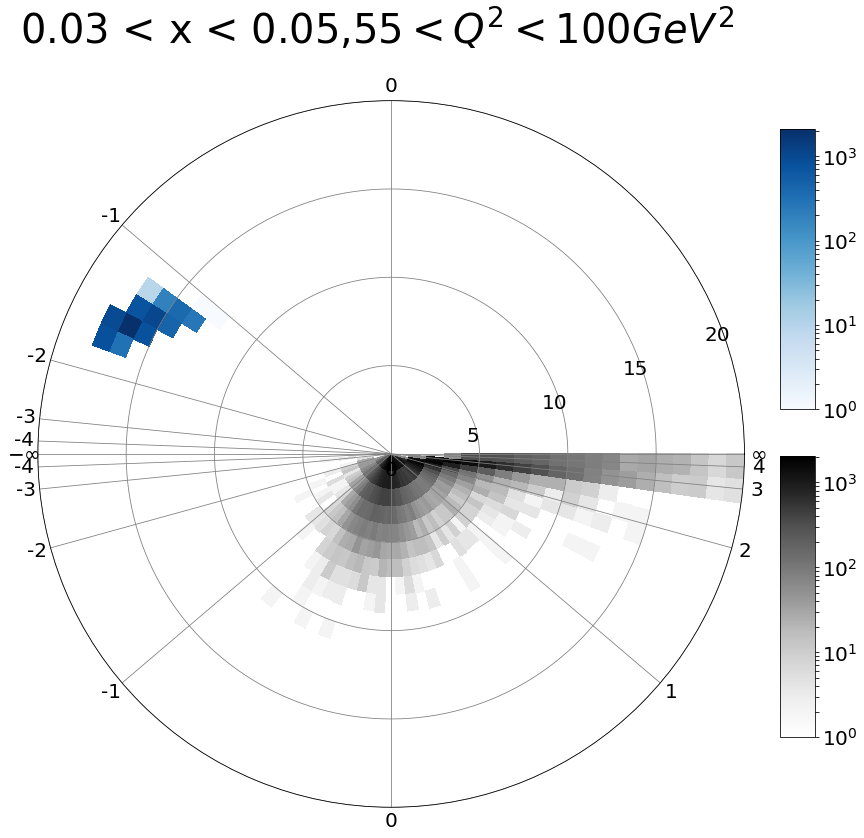

In [33]:
plot(3, 3, '55 < Q^2 < 100', '0.03 < x < 0.05', '55-100-03-05')


Remove extra jets 11005  fraction kept: 9.2


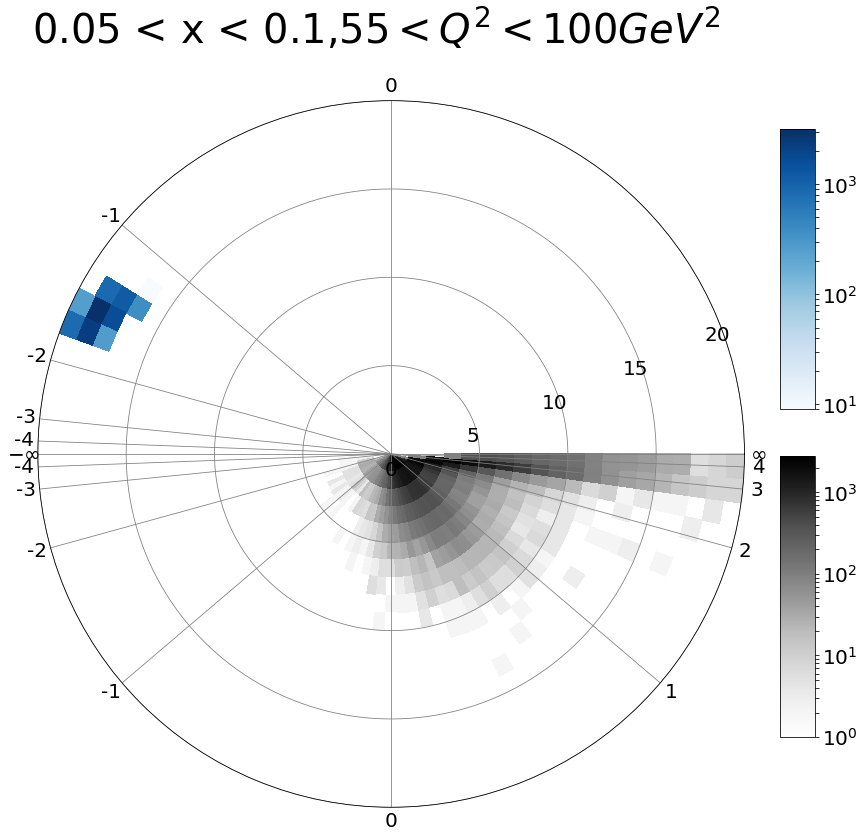

In [17]:
plot(3, 4, '55 < Q^2 < 100', '0.05 < x < 0.1', '55-100-05-1')


Remove extra jets 17858  fraction kept: 10.3


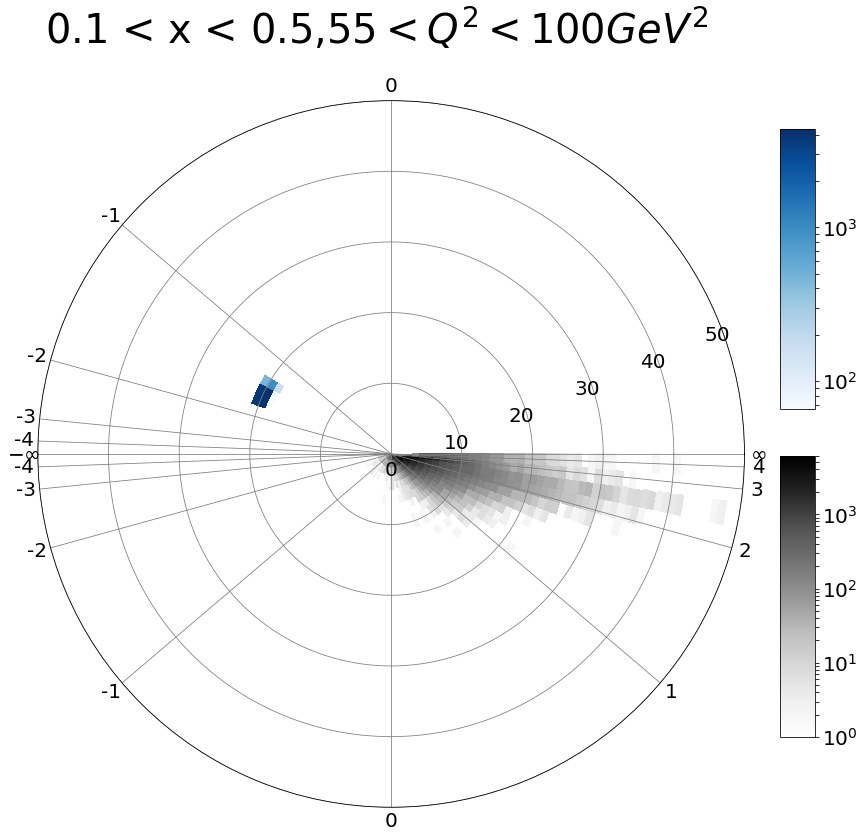

In [22]:
plot(3, 5, '55 < Q^2 < 100', '0.1 < x < 0.5', '55-100-1-5')

 
Remove extra jets 590  fraction kept: 8.1


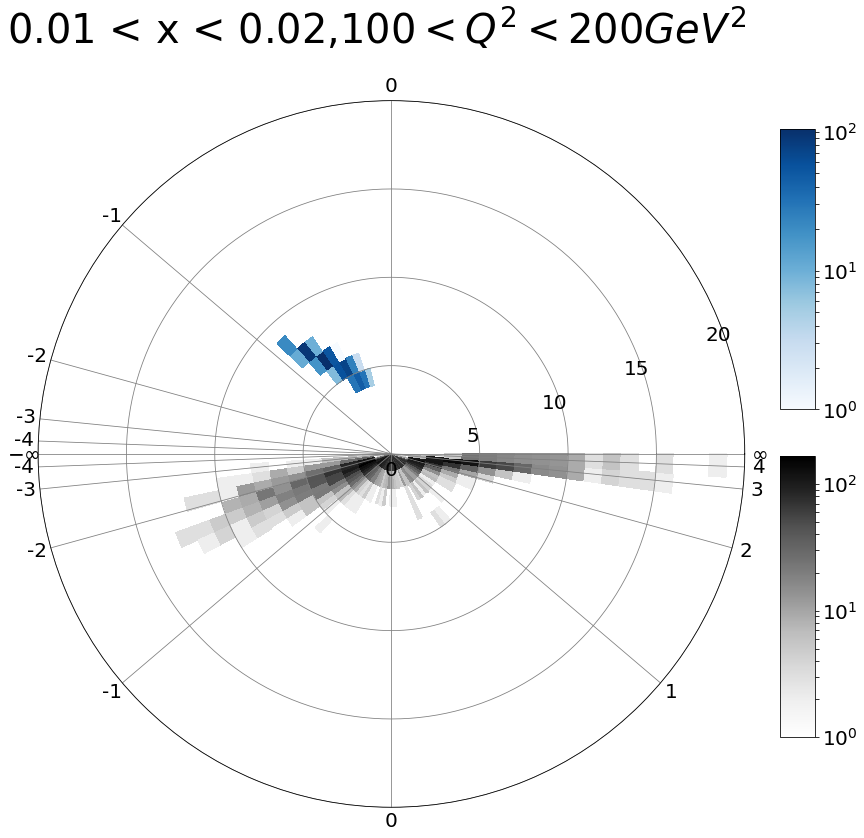

In [27]:
plot(4, 1, '100 < Q^2 < 200', '0.01 < x < 0.02', '100-200-01-02')


Remove extra jets 2500  fraction kept: 8.0


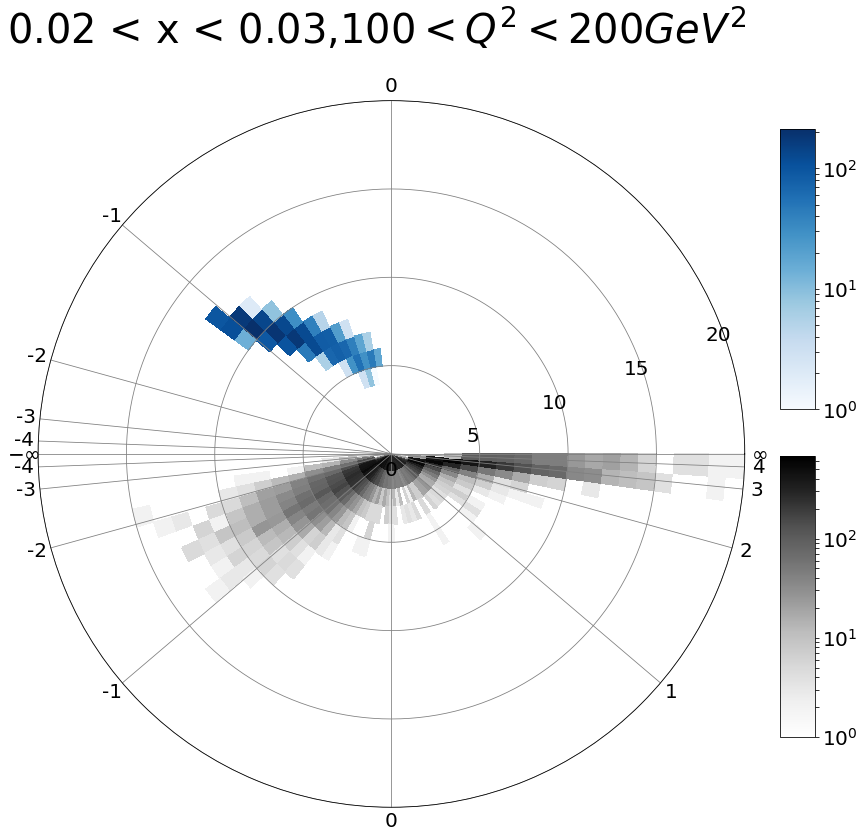

In [28]:
plot(4, 2, '100 < Q^2 < 200', '0.02 < x < 0.03', '100-200-02-03')


Remove extra jets 4254  fraction kept: 7.9


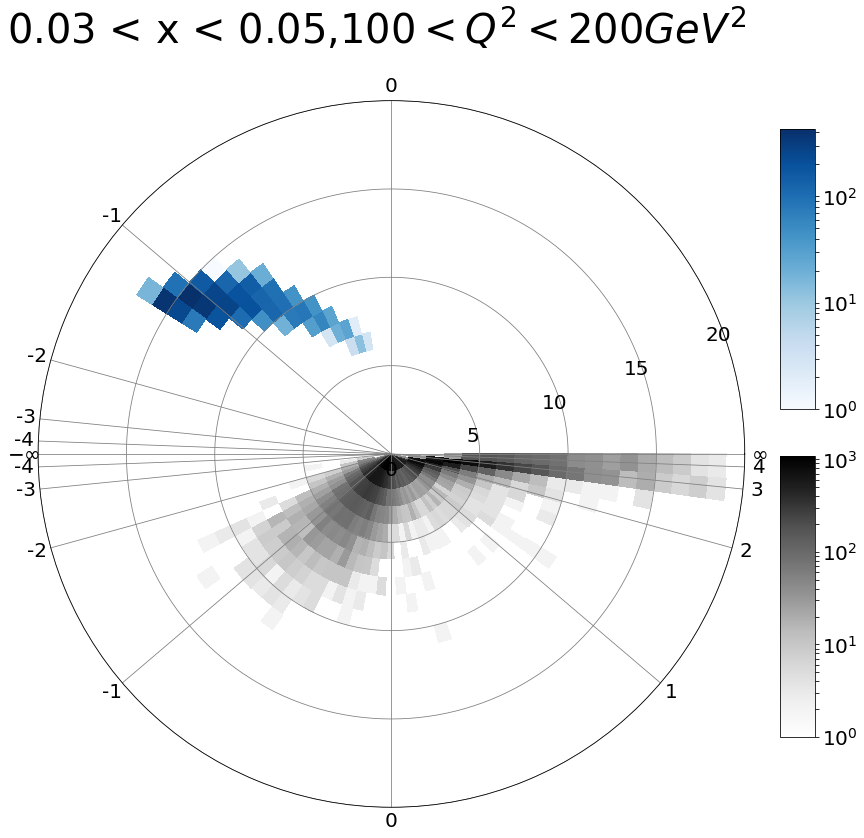

In [29]:
plot(4, 3, '100 < Q^2 < 200', '0.03 < x < 0.05', '100-200-03-05')


Remove extra jets 6079  fraction kept: 8.2


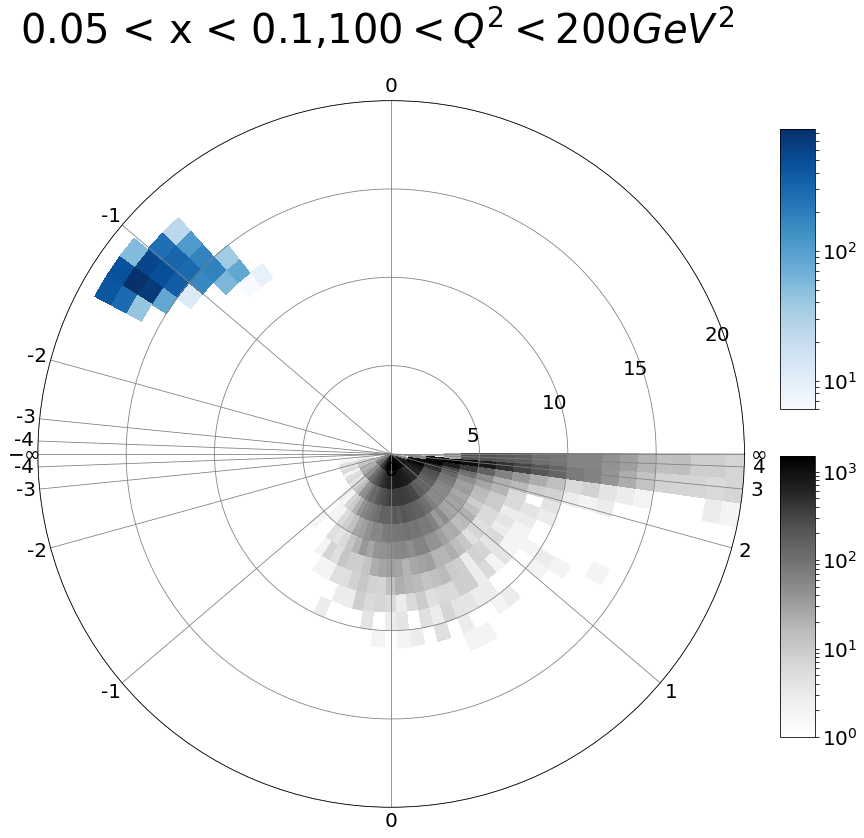

In [30]:
plot(4, 4, '100 < Q^2 < 200', '0.05 < x < 0.1', '100-200-05-1')


Remove extra jets 10282  fraction kept: 9.2


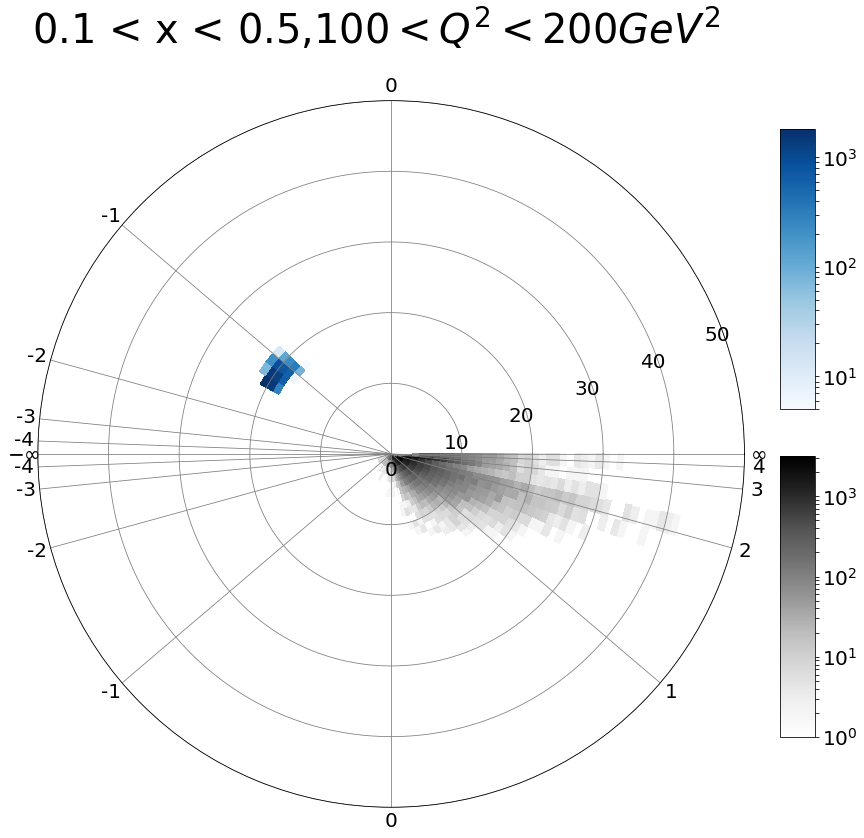

In [31]:
plot(4, 5, '100 < Q^2 < 200', '0.1 < x < 0.5', '100-200-1-5')

 
Remove extra jets 2  fraction kept: 8.0


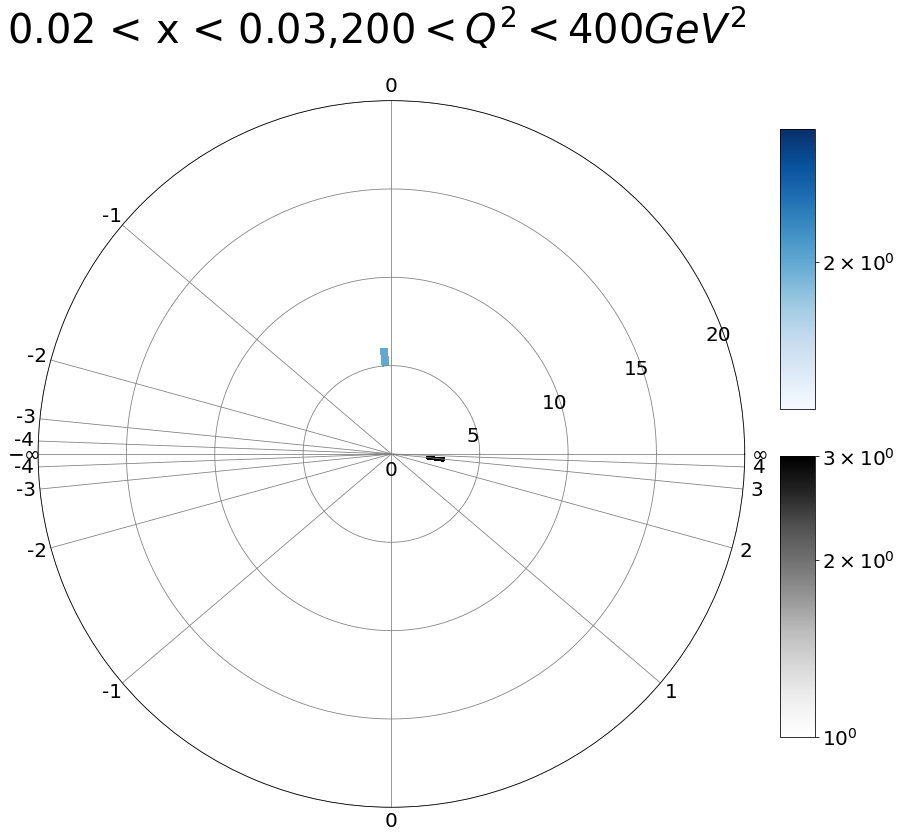

In [33]:
plot(5, 2, '200 < Q^2 < 400', '0.02 < x < 0.03', '200-400-02-03')


Remove extra jets 816  fraction kept: 7.7


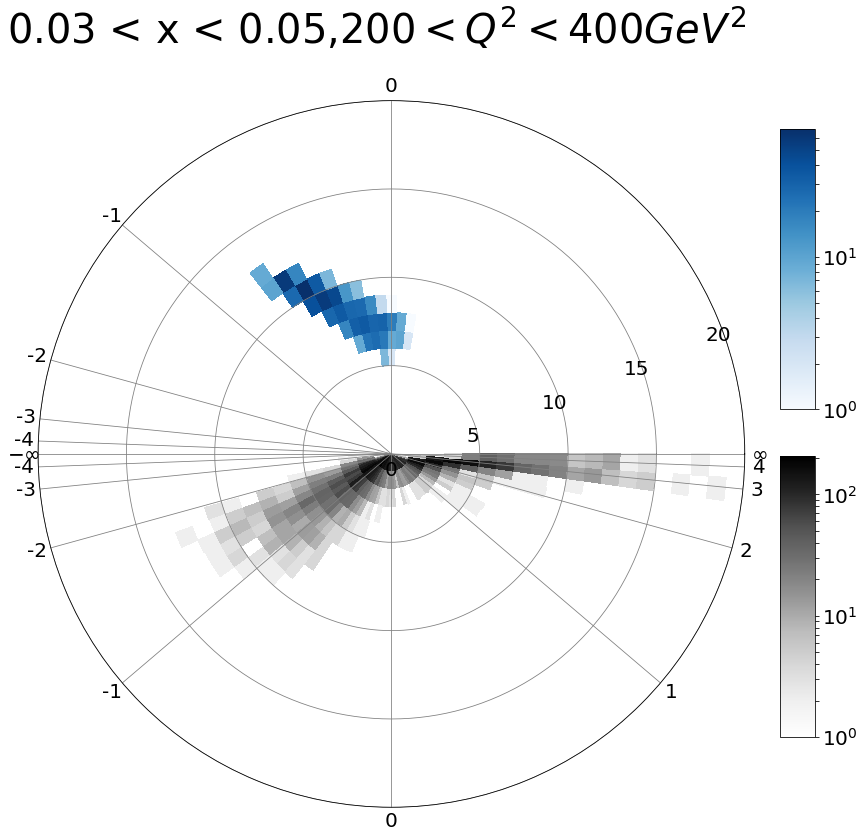

In [34]:
plot(5, 3, '200 < Q^2 < 400', '0.03 < x < 0.05', '200-400-03-05')


Remove extra jets 2445  fraction kept: 7.6


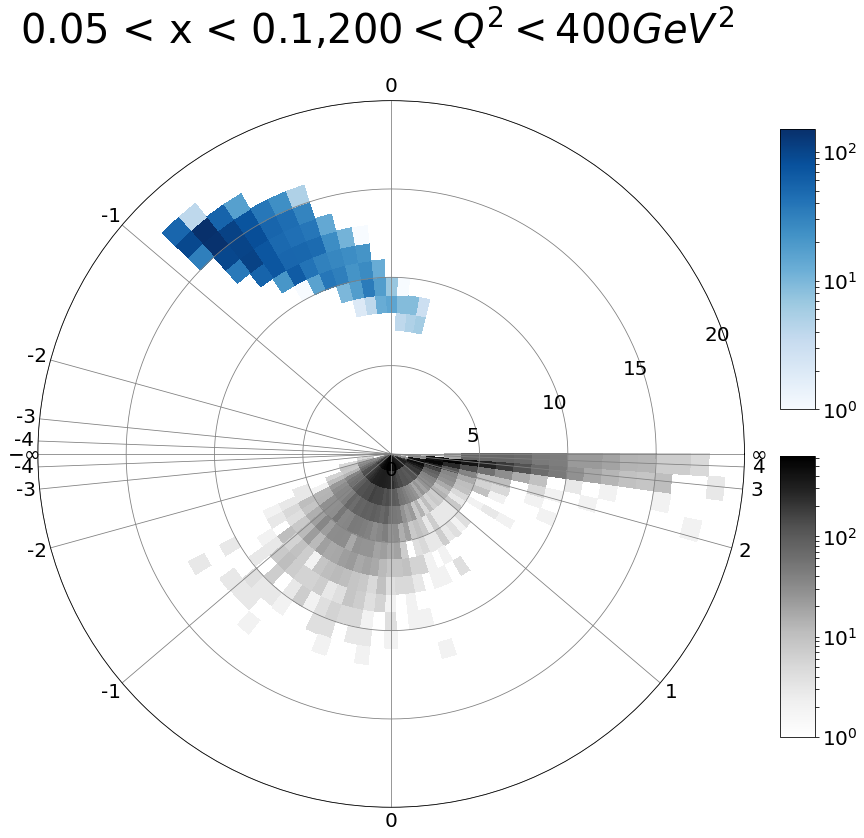

In [35]:
plot(5, 4, '200 < Q^2 < 400', '0.05 < x < 0.1', '200-400-05-1')


Remove extra jets 4599  fraction kept: 8.1


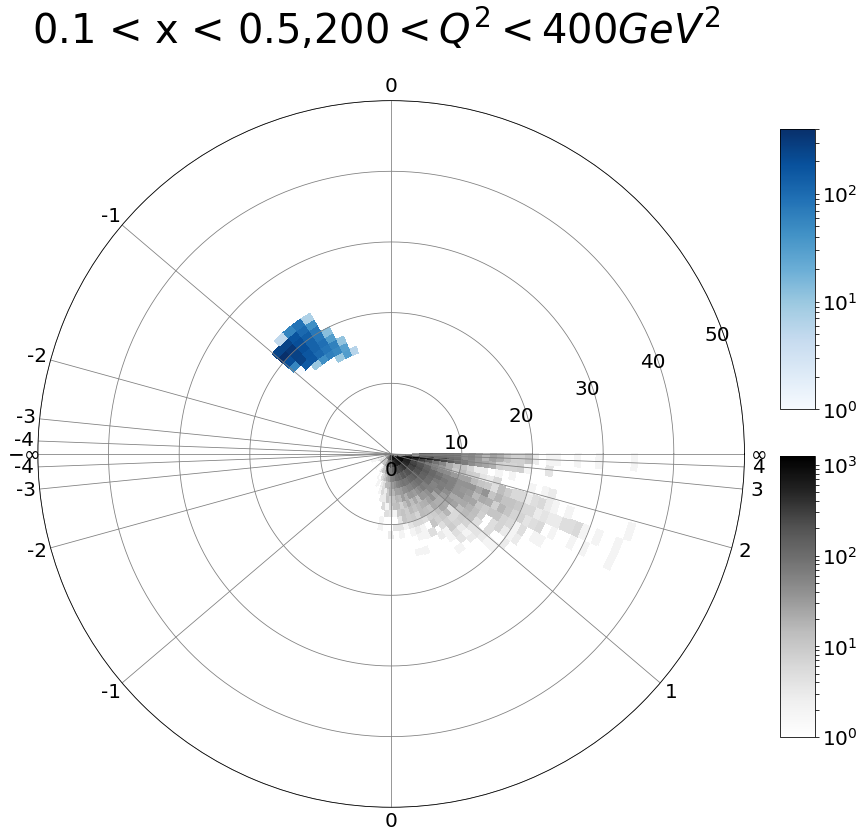

In [36]:
plot(5, 5, '200 < Q^2 < 400', '0.1 < x < 0.5', '200-400-1-5')

 
Remove extra jets 340  fraction kept: 7.0


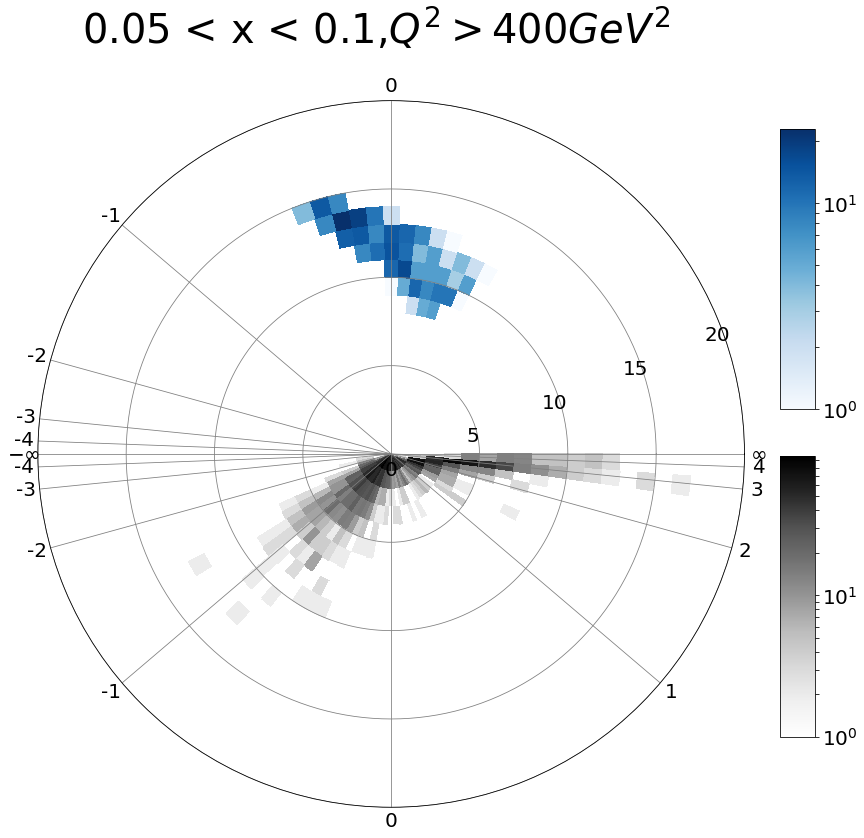

In [39]:
plot(6, 4, 'Q^2 > 400', '0.05 < x < 0.1', '400-05-1')


Remove extra jets 2495  fraction kept: 7.2


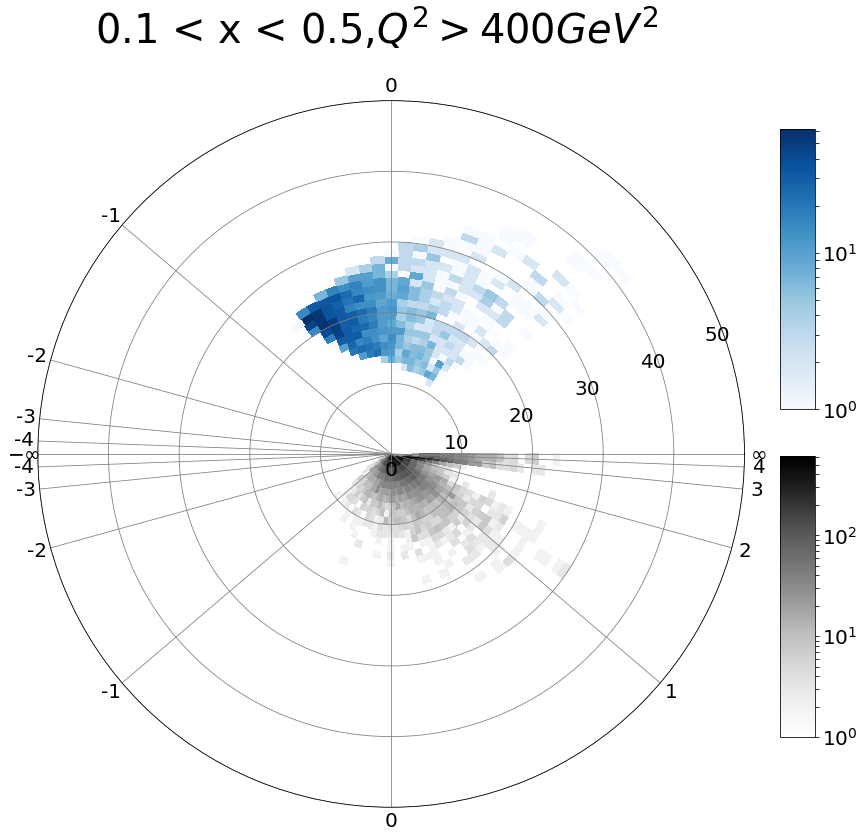

In [40]:
plot(6, 5, 'Q^2 > 400', '0.1 < x < 0.5', '400-1-5')